# EVALUACIÓN TÉCNICA

## Introducción
Este documento resume el proceso y los resultados de la evaluación técnica para el cargo de Analista en la Unidad de Inteligencia de Datos del Centro de Estudios del Ministerio de Educación. El propósito de esta evaluación es analizar la desvinculación de estudiantes en establecimientos particulares subvencionados y entender las dinámicas detrás de estos fenómenos.

## Fundamentos y Metodología

La evaluación se basa en el análisis de dos conjuntos de datos proporcionados: Rendimiento 2022 y Matrícula Oficial 2023. Las siguientes bibliotecas y herramientas de Python fueron utilizadas para procesar y analizar los datos:

- Pandas: para la manipulación y limpieza de los datos.
- Numpy: para operaciones numéricas.
- Matplotlib y Seaborn: para la visualización de datos.


El código adjunto en el archivo IPYNB/PY y script.py contiene todos los pasos de la carga, limpieza, transformación y análisis de los datos.


Se entiende como alumno desvinculados alumnos que no renuevan su mátricula entre el año 2022 y 2023 en el mismo establecimiento subvencionado.

En el [codigo](script.py) se utiliza la siguiente condición:

``

    # Condición de desvinculación
    disengagement_condition = (
            (df['RBD_x'].notna() & df['RBD_y'].isna()) |
            (df['COD_REG_RBD_x'].notna() & df['COD_REG_RBD_y'].isna())
    )
   
``


## Procesamiento de Datos y Cálculo de Desvinculación

Se crea script donde se procesan los datos.

Se agregan las siguientes columnas:

- ``count_disengaged``: El número de estudiantes desvinculados durante el periodo 2022-2023.
- ``count_matricula``: La cantidad de estudiantes matriculados en el año 2023.
- ``matricula_teorica``: La suma de count_matricula y count_disengaged, reflejando la cantidad total de estudiantes que estaban matriculados o se desvincularon.
- ``tasa_disengaged``: Tasa de desvinculación, es la proporción de count_disengaged sobre matricula_teorica.


In [1]:
from script import read_data_statics
stats = read_data_statics()

## Análisis de Datos




El análisis realizado identificó las tasas de desvinculación de estudiantes por región y por una categoría adicional seleccionada. Los resultados se presentan en tablas y gráficos correspondientes.

In [2]:
#Stats for regions
stats.get("REG").get("stats")

,COD_REG_RBD,NOM_REG_RBD_A_x,count_disengaged,NOM_REG_RBD_A_y,count_matricula,matricula_teorica,tasa_disengaged
0,1.0,TPCA,5594,TPCA,57410,63004,0.088788
1,2.0,ANTOF,3431,ANTOF,48774,52205,0.065722
2,3.0,ATCMA,1418,ATCMA,21386,22804,0.062182
3,4.0,COQ,8167,COQ,101977,110144,0.074148
4,5.0,VALPO,21944,VALPO,216562,238506,0.092006
5,6.0,LGBO,7593,LGBO,89104,96697,0.078524
6,7.0,MAULE,8225,MAULE,106635,114860,0.071609
7,8.0,BBIO,12249,BBIO,170624,182873,0.066981
8,9.0,ARAUC,13156,ARAUC,126219,139375,0.094393
9,10.0,LAGOS,9982,LAGOS,92863,102845,0.097059


In [3]:
#Stats for rbd-establishment
stats.get("RBD").get("stats")

,RBD,NOM_RBD_x,COD_REG_RBD_x,NOM_REG_RBD_A_x,count_disengaged,count_matricula,matricula_teorica,tasa_disengaged
0,45.0,COLEGIO ITALIANO SANTA ANA,15.0,AYP,100.0,940.0,1040.0,0.096154
1,50.0,COLEGIO ADVENTISTA DE ARICA,15.0,AYP,28.0,547.0,575.0,0.048696
2,52.0,LICEO BICENTENARIO DOMINGO SANTA MARIA,15.0,AYP,451.0,4088.0,4539.0,0.099361
3,56.0,COLEGIO SAN MARCOS DE ARICA,15.0,AYP,41.0,1027.0,1068.0,0.038390
4,60.0,COLEGIO ALEMAN DE ARICA,15.0,AYP,45.0,1043.0,1088.0,0.041360
...,...,...,...,...,...,...,...,...
5501,42154.0,ESCUELA HOSPITALARIA ENTRE VALLES,4.0,COQ,0.0,1.0,1.0,0.000000
5502,42158.0,INSTITUTO APRENDER ALERCE,10.0,LAGOS,0.0,253.0,253.0,0.000000
5503,42161.0,ESCUELA ESPECIAL PARA NIÑOS CON AUTISMO NUESTR...,5.0,VALPO,0.0,35.0,35.0,0.000000
5504,42166.0,CEIA INAPEWMA PUERTO LIMACHE,5.0,VALPO,0.0,36.0,36.0,0.000000


### Grafico por Región

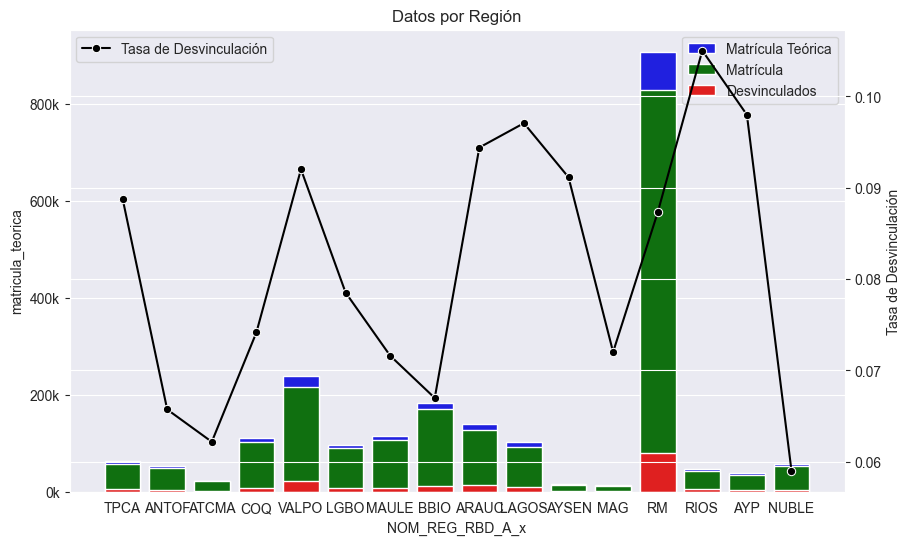

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Supongamos que este es tu DataFrame
df = stats.get("REG").get("stats")

# Configuración para un gráfico más grande
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar 'matricula_teorica'
sns.barplot(x='NOM_REG_RBD_A_x', y='matricula_teorica', data=df, color='blue', label='Matrícula Teórica', ax=ax1)

# Graficar 'matricula'
sns.barplot(x='NOM_REG_RBD_A_x', y='count_matricula', data=df, color='green', label='Matrícula', ax=ax1)


# Graficar 'desvinculados'
sns.barplot(x='NOM_REG_RBD_A_x', y='count_disengaged', data=df, color='red', label='Desvinculados', ax=ax1)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:.0f}k'.format(y/1000)))

# Crear un segundo eje Y para la tasa de desvinculación
ax2 = plt.gca().twinx()
sns.lineplot(x='NOM_REG_RBD_A_x', y='tasa_disengaged', data=df, ax=ax2, color='black', label='Tasa de Desvinculación', marker='o')

# Añadir leyenda
plt.legend(loc='upper left')

# Títulos y etiquetas
plt.title('Datos por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad')
ax2.set_ylabel('Tasa de Desvinculación')

plt.show()


## Conclusiones



- **Región con la tasa de desvinculación más alta**: ARAUC (0.217644), seguida de RIOS (0.216234), y AYSEN (0.209551). Esto indica que estas regiones tienen una mayor proporción de estudiantes desvinculados en relación con el total de estudiantes matriculados y desvinculados.

- **Región con la tasa de desvinculación más baja**: MAG (0.156624). A pesar de tener el número absoluto más bajo de desvinculados, su tasa de desvinculación es la más baja, lo que sugiere que la proporción de estudiantes que abandonan es menor en comparación con el número total de estudiantes.

- **Análisis por tamaño de matrícula**:
  - **Grandes matrículas**: RM tiene la matrícula más grande y también una alta tasa de desvinculación (0.198133), lo que podría ser motivo de preocupación y requerir atención para entender las causas detrás de esta tasa.
  - **Pequeñas matrículas**: AYSEN y MAG tienen matrículas mucho más pequeñas, pero sus tasas de desvinculación son significativamente diferentes, lo que indica que el tamaño de la matrícula no es el único factor que afecta la tasa de desvinculación.

- **Consideraciones adicionales**:
  - La relación entre la tasa de desvinculación y el tamaño de la matrícula teórica puede ser compleja y estar influenciada por muchos factores, como la calidad de la educación, el apoyo estudiantil, las condiciones económicas y sociales, entre otros.
  - Una tasa de desvinculación más alta en regiones con una matrícula teórica grande puede señalar desafíos específicos que enfrenta esa región en términos de retención de estudiantes.
  
Con estos datos, sería interesante realizar análisis adicionales para determinar las causas de la desvinculación y desarrollar estrategias para mejorar la retención de los estudiantes.

### Observaciones Generales
- 


## Referencias
